In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column
from functools import reduce

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{siunitx}')

In [3]:
# konstante

L = 199.5e-2
val_dol = 633e-9
k = np.pi * 2 / val_dol

# podatki

data1 = np.loadtxt('./measurements/1reza.dat')

data2 = np.loadtxt('./measurements/2rezi.dat')

data3 = np.loadtxt('./measurements/3reze.dat')

data5 = np.loadtxt('./measurements/5rez.dat')

data10 = np.loadtxt('./measurements/10rez.dat')


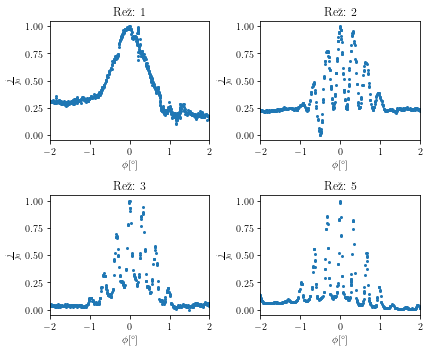

In [4]:
fig, axs = plt.subplots(2, 2, figsize=[6, 5])

aux = [[data1, data2, data3, data5], 
    axs.flat, 
    [1, 2, 3, 5]]

for data, ax, st in zip(*aux): 
    data[:, 0] = data[:, 0] * 1e-3

    x_0 = data[np.argmax(data[:, 1]), 0]

    phi = (data[:, 0] - x_0) / L

    data[:, 1] = data[:, 1] - np.min(data[:, 1])

    data[:, 1] = data[:, 1] / np.max(data[:, 1])

    ax.plot(np.rad2deg(phi), data[:, 1], linestyle='', marker='o', markersize=2)
    ax.set_xlim(-2, 2)
    ax.set_title(f'Rež: {st}')
    ax.set_xlabel(r'$\phi [^\circ]$')
    ax.set_ylabel(r'$\frac{j}{j_0}$')

fig.tight_layout()
fig.savefig('reze.pdf')

In [5]:
def linear(x, k, c): 
    return k * x + c

In [6]:
val_dol = 633e-9

d = unp.uarray([11.2e-2], [0.1e-2])
z_0 = unp.uarray([36e-2 + 107e-2], [2e-2])
f = unp.uarray([1.6e-2], [0.2e-2])

x = unp.uarray([183.3, 150, 132, 116, 103, 93, 86], 7 * [0.5]) * 1e-3

x -= -77e-3

z_f = d - f + x
z_z = z_0 - x

rec_R = 1/z_f + 1/z_z

n = np.arange(len(rec_R))

par, cov = curve_fit(linear, n, unp.nominal_values(rec_R/val_dol))

k_1, c = par 
dk_1, _  = np.sqrt(np.diag(cov))
k = unp.uarray([k_1], [dk_1])

r = unp.sqrt(1/k)

r * 1e3


array([1.9751243136490104+/-0.06257550920114009], dtype=object)

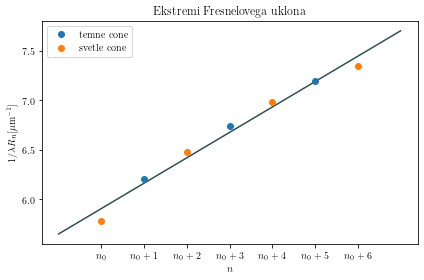

In [14]:
# Plot

fig, ax = plt.subplots(1, 1)

ax.scatter(n[1::2], 1e-6 * unp.nominal_values(rec_R)[1::2]/val_dol, label=r'temne cone')
ax.scatter(n[0::2], 1e-6 * unp.nominal_values(rec_R)[0::2]/val_dol, label=r'svetle cone')
n_lin = np.arange(-1, len(n)+1)
ax.plot(n_lin, 1e-6 * linear(n_lin, *par), color='darkslategrey', linestyle='-', zorder=-1)

#ax.set_xlim(-0.5, 4.5)
ax.set_title(r'Ekstremi Fresnelovega uklona')
ax.set_xlabel(r'$n$')
ax.set_ylabel(r'$1/\lambda R_n [\si{\mu m^{-1}}]$')
ax.set_xticks(n)
ax.set_xticklabels([r'$n_0$'] + [f'$n_0 + {i}$' for i in [1, 2, 3, 4, 5, 6]])
ax.legend()
fig.tight_layout()
fig.savefig(f'fresnel-zones.pdf')
